In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
import os
print(os.getcwd())

c:\Users\danie\Machine_Learning_House_Prediction_Project\notebooks


In [3]:
import os
os.chdir('..')  # Move one level up to the parent directory
print(os.getcwd())  # Confirm the new working directory

c:\Users\danie\Machine_Learning_House_Prediction_Project


In [4]:
print(os.getcwd())

c:\Users\danie\Machine_Learning_House_Prediction_Project


In [14]:
#FEATURE ENGINEERING

In [15]:
test_df = pd.read_csv('data/processed/test_data_cleaned_folder/test_data_cleaned.csv')
df = pd.read_csv('data/processed/training_data_cleaned_folder/training_data_cleaned.csv')

In [16]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1435,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1436,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1437,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1439 non-null   int64  
 1   MSSubClass     1439 non-null   int64  
 2   MSZoning       1439 non-null   object 
 3   LotFrontage    1439 non-null   float64
 4   LotArea        1439 non-null   int64  
 5   Street         1439 non-null   object 
 6   LotShape       1439 non-null   object 
 7   LandContour    1439 non-null   object 
 8   Utilities      1439 non-null   object 
 9   LotConfig      1439 non-null   object 
 10  LandSlope      1439 non-null   object 
 11  Neighborhood   1439 non-null   object 
 12  Condition1     1439 non-null   object 
 13  Condition2     1439 non-null   object 
 14  BldgType       1439 non-null   object 
 15  HouseStyle     1439 non-null   object 
 16  OverallQual    1439 non-null   int64  
 17  OverallCond    1439 non-null   int64  
 18  YearBuil

##### Feature Engineering: Age of the House (`AgeOfHouse`)

This feature calculates the number of years since the house was built until the year it was sold. Understanding the age of a house is crucial as it provides insights into the property's condition and historical value.

##### Formula:
`AgeOfHouse = YrSold - YearBuilt`

##### Purpose:
The `AgeOfHouse` feature helps capture the property's age, which can be an important predictor of its value and appeal to potential buyers.


In [18]:
df['AgeOfHouse'] = df['YrSold'] - df['YearBuilt']
test_df['AgeOfHouse'] = test_df['YrSold'] - test_df['YearBuilt']

##### Feature Engineering: Age Since Last Remodel (`HouseRemodelAge`)

This feature calculates the number of years since the house underwent its last major remodeling until the year it was sold. Remodeling can significantly influence a property's modernity and desirability.

##### Purpose:
The `HouseRemodelAge` feature provides insights into how recently the house was updated, which is a key factor in understanding its marketability and price.


In [19]:
df['HouseReamodelAge'] = df['YrSold'] - df['YearRemodAdd']
test_df['HouseReamodelAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

##### Feature Engineering: Total Square Footage (`TotalSqFt`)

This feature combines all the individual square footage values for a house to represent the total livable area across all floors. Buyers often consider the total square footage of a property as a primary indicator of its size and value.

##### Purpose:
The `TotalSqFt` feature aggregates the total area of the house, making it easier to analyze and compare properties. It captures the overall livable space, which is a significant determinant in pricing and buyer preferences.


In [20]:
df['HouseTotalSqFt'] = df['1stFlrSF'] + df['2ndFlrSF'] +  + df['BsmtFinSF1'] + df['BsmtFinSF2'] #+ df['BsmtUnfSF']
test_df['HouseTotalSqFt'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

In [21]:
df['TotalHouseArea'] = df['GrLivArea'] + df['TotalBsmtSF']
test_df['TotalHouseArea'] = test_df['GrLivArea'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [22]:
df['TotalNumBaths'] = df['FullBath']  + df['BsmtFullBath'] + df['FullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'])
test_df['TotalNumBaths'] =  test_df['FullBath']  + test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'] )

In [23]:
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
test_df['TotalPorchArea'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [24]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,AgeOfHouse,HouseReamodelAge,HouseTotalSqFt,TotalHouseArea,TotalNumBaths,TotalPorchArea
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,5,5,2416,2566,5.5,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,31,31,2240,2524,4.5,298
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,7,6,2272,2706,5.5,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,91,36,1933,2473,3.0,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,8,8,2853,3343,5.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,8,7,1647,2600,4.5,40
1435,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,32,22,3026,3615,5.0,349
1436,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,69,4,2615,3492,4.0,60
1437,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,142125,60,14,2156,2156,3.0,478


After Doing The feature Engineering we will consider multiple cases to keep the some of the columns to see what fits best for the algorithims

In [25]:
df = df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

In [26]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,SaleType,SaleCondition,SalePrice,AgeOfHouse,HouseReamodelAge,HouseTotalSqFt,TotalHouseArea,TotalNumBaths,TotalPorchArea
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,WD,Normal,208500,5,5,2416,2566,5.5,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,WD,Normal,181500,31,31,2240,2524,4.5,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,WD,Normal,223500,7,6,2272,2706,5.5,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,WD,Abnorml,140000,91,36,1933,2473,3.0,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,WD,Normal,250000,8,8,2853,3343,5.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,WD,Normal,175000,8,7,1647,2600,4.5,40
1435,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,WD,Normal,210000,32,22,3026,3615,5.0,349
1436,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,5,WD,Normal,266500,69,4,2615,3492,4.0,60
1437,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4,WD,Normal,142125,60,14,2156,2156,3.0,478


## Purpose of the Heatmap

### Why Create a Heatmap?

A heatmap is a powerful visualization tool for understanding the relationships between numerical variables in a dataset. By representing the correlation matrix visually, it helps us quickly identify patterns and relationships that may not be immediately apparent from raw data or numerical summaries.

### Objective:
The purpose of creating a heatmap in this analysis is to:
- **Identify Strong Relationships**: Highlight numerical features that have a strong positive or negative correlation with the target variable (e.g., `SalePrice`). These relationships can help prioritize which features are more likely to be predictive of the target.
- **Detect Multicollinearity**: Pinpoint pairs of features that are highly correlated with each other. Multicollinearity can reduce the effectiveness of a predictive model, so identifying these relationships can guide feature selection or engineering.
- **Feature Selection**: Help in deciding which variables to include in the model by understanding how strongly they relate to the target and to each other


<Axes: >

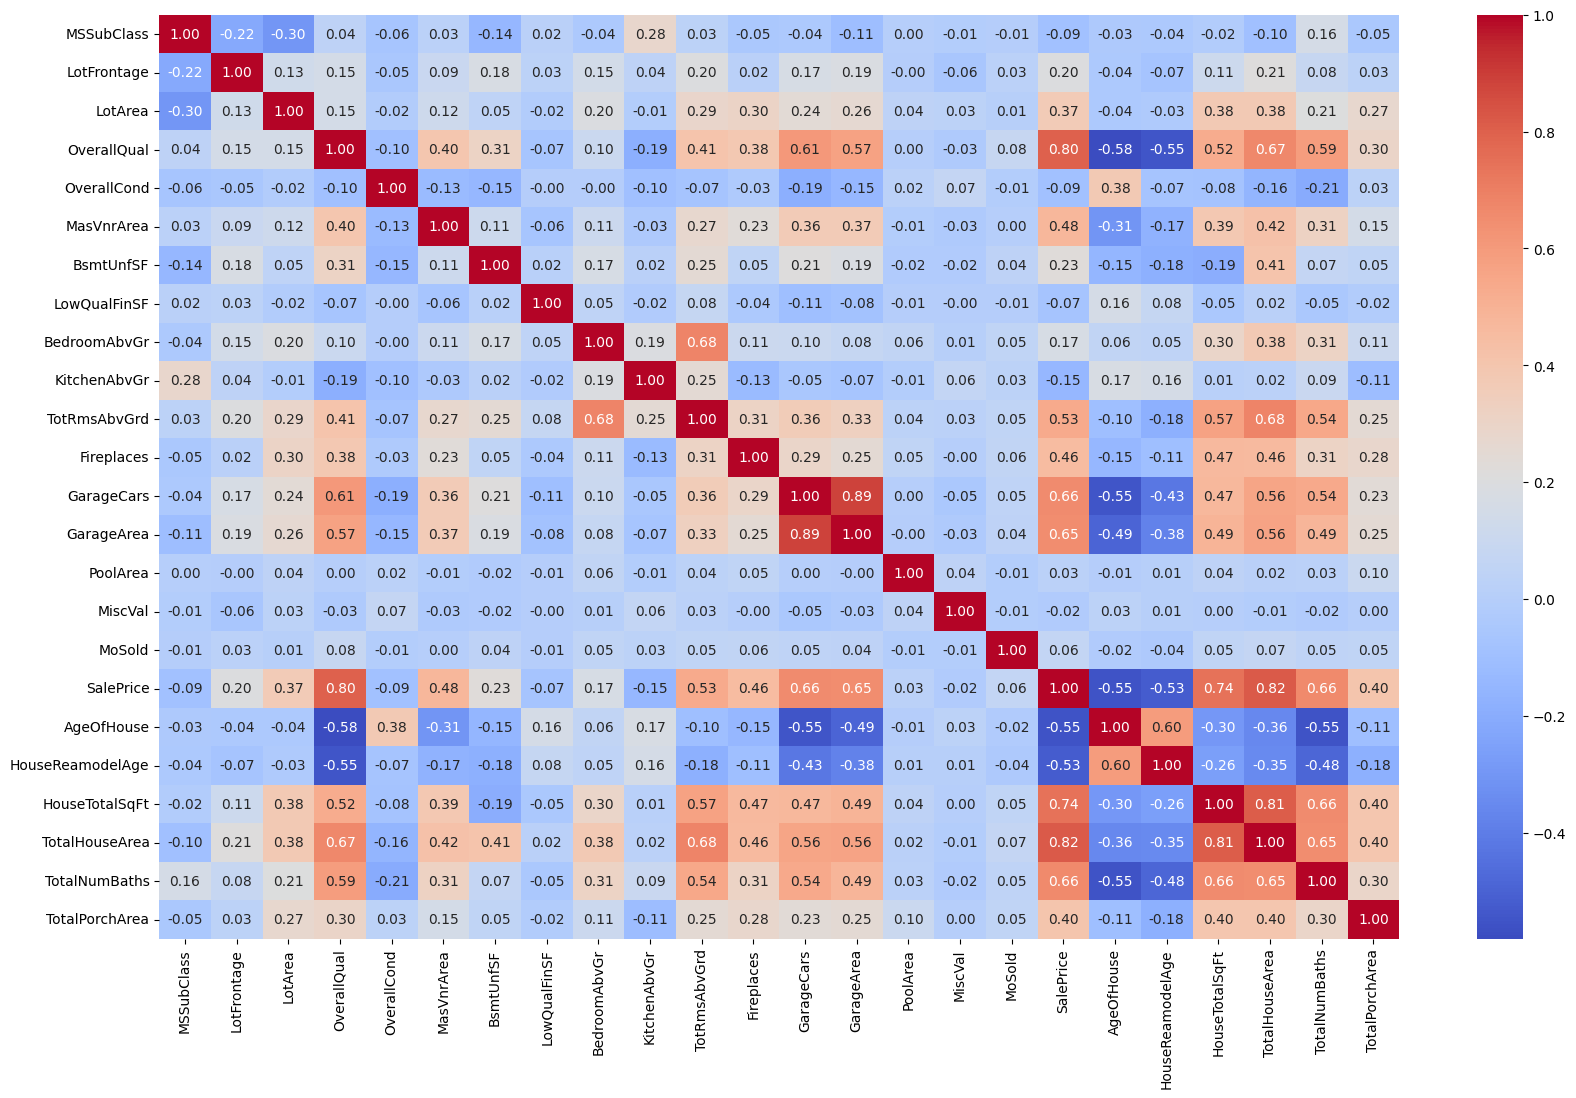

In [27]:
correlation =df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

We see from the heatmap that GarageArea and GarageCars have high correlation which means we need to pick form the two but since the correlation of GarageCars with SalePrice is slighy higher than GarageArea we should remove GarageArea

### Log Transformation of SalePrice

The histogram above shows the original distribution of the `SalePrice` feature. It is evident that the distribution is right-skewed, meaning that there are many houses with lower prices and a few houses with extremely high prices.

#### Purpose of Log Transformation:
1. **Normalize the Distribution**:
   - A normal distribution is often preferred in machine learning models, especially for regression tasks, as it improves the performance and interpretability of the model. The log transformation helps reduce the skewness of the data and brings it closer to a normal distribution.

2. **Reduce the Impact of Outliers**:
   - Extremely high sale prices (outliers) can disproportionately influence the results of the model. By applying a log transformation, the impact of these outliers is minimized, making the model more robust.

3. **Improve Model Accuracy**:
   - Many machine learning algorithms perform better when the target variable is normally distributed. The log transformation ensures that the distribution of `SalePrice` aligns better with the assumptions of these algorithms, potentially leading to higher accuracy and more reliable predictions.

By transforming `SalePrice` with a logarithmic function, we aim to enhance the model's ability to capture meaningful relationships between features and the target variable while reducing the influence of extreme values.


In [28]:
df = df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

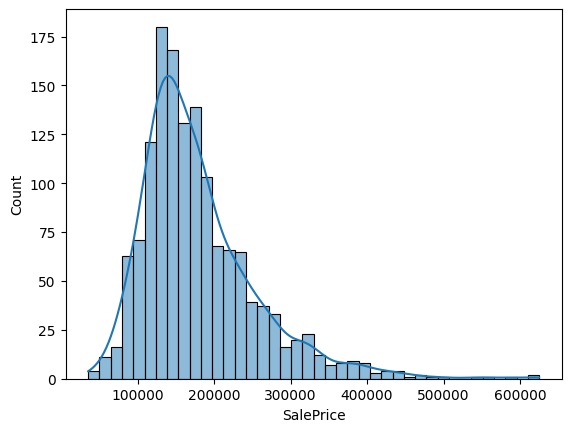

In [29]:
sns.histplot(df['SalePrice'], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

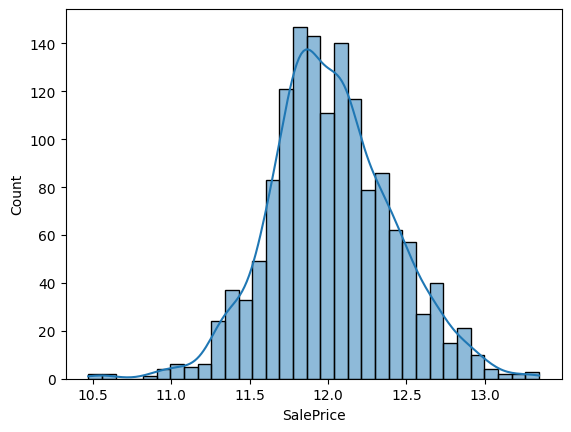

In [30]:
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice'], kde=True)

We can see from the heatmap that GarageArea and HouseTotalSqFt we can due to the highcorrelation

In [31]:
df.dtypes[df.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [32]:
df.dtypes[df.dtypes != 'object']

MSSubClass            int64
LotFrontage         float64
LotArea               int64
OverallQual           int64
OverallCond           int64
MasVnrArea          float64
BsmtUnfSF             int64
LowQualFinSF          int64
BedroomAbvGr          int64
KitchenAbvGr          int64
TotRmsAbvGrd          int64
Fireplaces            int64
GarageCars            int64
PoolArea              int64
MiscVal               int64
MoSold                int64
SalePrice           float64
AgeOfHouse            int64
HouseReamodelAge      int64
HouseTotalSqFt        int64
TotalHouseArea        int64
TotalNumBaths       float64
TotalPorchArea        int64
dtype: object

### Encoding Categorical Features

When preparing categorical data for machine learning models, it is crucial to select the appropriate encoding method to ensure the model interprets the features correctly for features with object types. Below is an explanation of the two primary encoding methods used and how I divided the features to prepare it for the models, as derived from analyzing the `data_description.txt` file:

- **OrdinalEncoder**:
  - Used for categorical features with a clear order or ranking (e.g., quality ratings like `Poor`, `Average`, `Good`), which is seen with features such as `LandSlope`, `BsmtQual`, `HeatingQC`, etc.

- **OneHotEncoder**:
  - Used for categorical features without a natural order (e.g., neighborhood names or product types), such as `Street`, `Neighborhood`, and `SaleType`.


In [33]:
ordinal_Encoding_features =  ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']



In [34]:
one_hot_Encoding_feature = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

We will now create a pipeline to preprocess the data for each type of feature and then combine them into a single pipeline

## Preprocessing Pipelines for Data Preparation

This section documents the preprocessing pipelines used to prepare the data for modeling. The pipelines handle imputation, scaling, and encoding based on the type of data: numerical, ordinal categorical, and nominal categorical. These pipelines ensure that the data is clean, standardized, and properly encoded for downstream machine learning models.


In [35]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('SalePrice')

In [36]:
numeric_columns_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
]) 

In [37]:
ordinal_Encoding_features_pipeline =Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [38]:
one_hot_Encoding_feature_pipeline =  Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [39]:
columns_transformer = ColumnTransformer(transformers = [
    ('numeric_pipline', numeric_columns_pipeline, numeric_columns),
    ('ordinal_pipeline', ordinal_Encoding_features_pipeline, ordinal_Encoding_features), 
    ('one_hot_pipeline', one_hot_Encoding_feature_pipeline, one_hot_Encoding_feature)],
    remainder='passthrough', 
    n_jobs=-1)

In [40]:
pipeline = Pipeline(steps=[
    ('preprocessing', columns_transformer)
])

In [41]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [42]:
X_preprocessed  = pipeline.fit_transform(X)

In [62]:
type(X_preprocessed)

numpy.ndarray

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [64]:
X_train

array([[-0.15907295,  0.09266706,  0.15376934, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07887505, -1.73485105, -0.22152654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27804695,  0.03174979, -0.67356621, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.87291695,  0.45817069,  0.3495596 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07887505,  0.88459158,  0.07515374, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15907295,  2.46844061,  1.50708064, ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
y_train_sorted = y_train.sort_index()
y_train_sorted

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1434    12.072547
1435    12.254868
1436    12.493133
1437    11.864469
1438    11.901590
Name: SalePrice, Length: 1151, dtype: float64

In [66]:
y_train.shape

(1151,)

In [67]:
linearRegression  = LinearRegression()

In [68]:
linearRegression.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred_lr = linearRegression.predict(X_test)

In [ ]:
y_pred_lr = linearRegression.predict(X_train)

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual and predicted values
plt.figure(figsize=(8, 6))

# Plot actual values
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Actual Values (y_train)')

# Plot predicted values
plt.scatter(X_train, y_pred_lr, color='red', alpha=0.6, label='Predicted Values (y_pred_lr)')

# Add labels and title
plt.xlabel('X_train')
plt.ylabel('Values')
plt.title('X_train vs. Actual and Predicted Values')
plt.legend()
plt.show()


In [51]:
y_pred_lr

array([ 1.24886322e+01,  1.19080200e+01,  1.21487885e+01,  1.18915863e+01,
        1.23229828e+01,  1.23582306e+01, -3.28790115e+09,  1.13754425e+01,
        1.27038116e+01,  1.19435272e+01,  1.18007965e+01,  1.14253998e+01,
        1.19017792e+01,  1.17645721e+01,  1.19552460e+01,  1.22141724e+01,
        1.21609344e+01,  1.18103485e+01,  1.15004120e+01,  3.34720068e+10,
        1.20374451e+01,  1.17571869e+01, -8.12010665e+09,  1.24426422e+01,
        1.20736389e+01,  1.21989441e+01,  1.24850922e+01,  1.21196442e+01,
        1.21550751e+01,  1.18554688e+01,  1.14809418e+01,  1.17871704e+01,
        1.14653473e+01,  1.23155670e+01,  1.23718414e+01,  1.14379425e+01,
        1.25137787e+01,  1.23025360e+01,  1.19145355e+01,  1.16707306e+01,
        1.27352448e+01,  1.15916290e+01,  1.23349609e+01,  1.24297638e+01,
        1.20923004e+01,  1.22670441e+01,  1.21441956e+01,  1.12644196e+01,
        1.18625031e+01,  1.24746704e+01,  1.22234039e+01,  1.18545990e+01,
        1.21809082e+01,  

In [59]:
y_test

543     12.450982
123     11.944065
1262    12.100718
270     11.842236
775     12.141539
          ...    
1333    12.367345
446     12.254868
683     12.078245
1204    11.834291
1339    12.149508
Name: SalePrice, Length: 288, dtype: float64

In [60]:
y_pred_lr

array([ 1.24886322e+01,  1.19080200e+01,  1.21487885e+01,  1.18915863e+01,
        1.23229828e+01,  1.23582306e+01, -3.28790115e+09,  1.13754425e+01,
        1.27038116e+01,  1.19435272e+01,  1.18007965e+01,  1.14253998e+01,
        1.19017792e+01,  1.17645721e+01,  1.19552460e+01,  1.22141724e+01,
        1.21609344e+01,  1.18103485e+01,  1.15004120e+01,  3.34720068e+10,
        1.20374451e+01,  1.17571869e+01, -8.12010665e+09,  1.24426422e+01,
        1.20736389e+01,  1.21989441e+01,  1.24850922e+01,  1.21196442e+01,
        1.21550751e+01,  1.18554688e+01,  1.14809418e+01,  1.17871704e+01,
        1.14653473e+01,  1.23155670e+01,  1.23718414e+01,  1.14379425e+01,
        1.25137787e+01,  1.23025360e+01,  1.19145355e+01,  1.16707306e+01,
        1.27352448e+01,  1.15916290e+01,  1.23349609e+01,  1.24297638e+01,
        1.20923004e+01,  1.22670441e+01,  1.21441956e+01,  1.12644196e+01,
        1.18625031e+01,  1.24746704e+01,  1.22234039e+01,  1.18545990e+01,
        1.21809082e+01,  

ValueError: x and y must be the same size

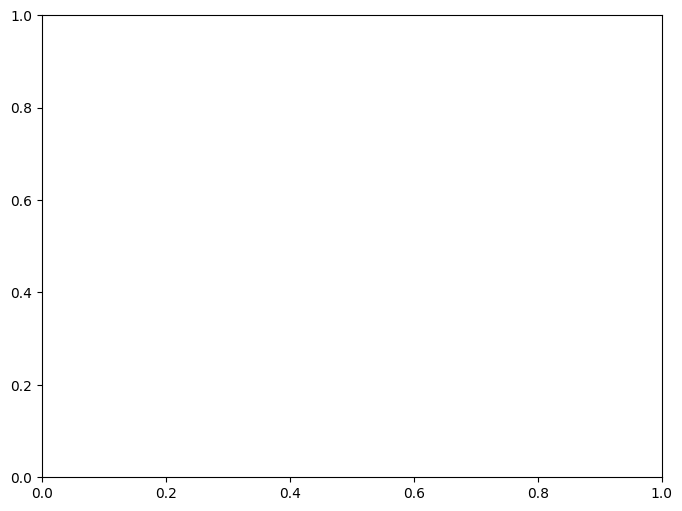

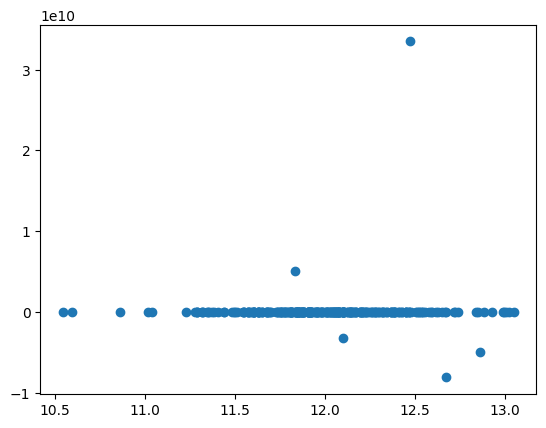

In [58]:
plt.scatter(y_test, y_pred_lr)

In [52]:
intercept = linearRegression.intercept_
coefficients = linearRegression.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Save predictions to variables
y_pred_train = linearRegression.predict(X_train)
y_pred_test = linearRegression.predict(X_test)

# Print out the predictions
print("Train Predictions:", y_pred_train)
print("Test Predictions:", y_pred_test)

Intercept: -101968106236.35551
Coefficients: [-1.11197289e-02  1.55278462e-03  2.46251384e-02  5.92490622e-02
  4.78782521e-02  7.36976103e-03  1.29194947e+11  1.27003853e+10
 -3.40923755e-03 -4.91446278e-03  1.78794465e-02  1.75610342e-02
  3.48324667e-02  2.23348761e-03 -3.58261972e-04 -4.19320539e-04
 -5.20528628e-02 -1.26317193e-02  2.03776444e+11 -2.19116262e+11
  1.18082867e-02  1.90030411e-02 -2.75363107e-05 -5.81150258e-03
  5.00155667e+09  5.30191459e-03 -3.50024493e-03  1.08754438e-05
  4.46976565e-02  1.83351559e-02  1.60854683e-03 -3.31405406e-03
  7.77318354e-03  1.59530640e-02  1.48773193e-02 -1.31530762e-02
  1.43432617e-03 -6.92749023e-03  2.41851807e-03  5.31768799e-03
 -4.14102141e+10 -4.14102141e+10 -3.32420381e+10 -3.32420381e+10
 -3.32420381e+10 -3.32420381e+10 -3.32420381e+10  7.75959751e+09
  7.75959751e+09  7.75959751e+09  7.75959751e+09  7.75959751e+09
  7.75959751e+09  7.75959751e+09  7.75959751e+09  7.75959751e+09
  7.75959751e+09  7.75959751e+09  7.75959751e

In [53]:
y_pred_linearRegression = linearRegression.predict(X_test)

In [54]:
mean_squared_error(y_test, y_pred_linearRegression)

4.3293816817153475e+18

In [55]:
linearRegression.score(X_test, y_test)

-2.7396220693500023e+19

In [56]:
linearRegression.score(X_train, y_train)

0.9444972689599445

In [57]:
RFR = RandomForestRegressor(random_state=13)

In [76]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [77]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [78]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [79]:
np.sqrt(-1 * rfr_cv.best_score_)

0.1335391111144618

In [80]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 100}

In [81]:
XGB = XGBRegressor(random_state=13)

In [82]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [83]:

xgb_cv = GridSearchCV(estimator=XGB, param_grid=param_grid_XGB, 
                      cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# Fit the model
xgb_cv.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", xgb_cv.best_params_)



Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# Print the best parameters
print("Best Parameters:", xgb_cv.best_params_)


In [85]:
ridge  = Ridge()

In [86]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [87]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [88]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [89]:
np.sqrt(-1 * ridge_cv.best_score_)

0.10884138687052707

In [90]:
GBR = GradientBoostingRegressor(random_state=13)

In [91]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [92]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [93]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=13),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [94]:
np.sqrt(-1 * GBR_cv.best_score_)

0.11464883552998334

In [95]:
lgbm_regressor  =  lgb.LGBMRegressor(random_state=13)   

In [96]:
param_grid_lgbm = {
    'boosting_type' : ['gbdt', 'dart'],
    'num_leaves' : [20, 30, 40],
    'learning_rate' : [0.05, 0.1, 0.2,0.1],
    'n_estimators' : [100,200,300]
}
    

In [97]:
lgbm_regressor_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv = 4, scoring = 'neg_mean_squared_error', n_jobs=-1)

In [ ]:
lgbm_regressor_cv.fit(X_train, y_train)

In [88]:
np.sqrt(-1 * lgbm_bregressor_cv.best_score_)

0.1216988431657762

In [102]:
CatBoostRegressor = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [103]:
param_grid_cat = {
    'iterations' : [100,400,500,1000],
    'depth' : [4,6,8,10],
    'learning_rate' : [0.01,0.05,0.1,0.5]
    
}

In [104]:
CatBoostRegressor_cv = GridSearchCV(CatBoostRegressor, param_grid_cat, cv = 4, scoring = 'neg_mean_squared_error', n_jobs=-1)

In [105]:
CatBoostRegressor_cv.fit(X_train, y_train)

c:\Users\danie\Machine_Learning_House_Prediction_Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
13 fits failed out of a total of 256.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\danie\Machine_Learning_House_Prediction_Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\danie\Machine_Learning_House_Prediction_Project\venv\Lib\site-packages\catboost\core.py", line 5873, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, 

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000019510923920>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10],
                         'iterations': [100, 400, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [106]:
np.sqrt(-1 * CatBoostRegressor_cv.best_score_)

0.11083287944761103

In [89]:
vr = VotingRegressor( [('gbr' , GBR_cv.best_estimator_), ('xgb', xgb_cv.best_estimator_), ('ridge', ridge_cv.best_estimator_)], weights=[2, 3, 1])

In [92]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=20,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=300,
                                                       random_state=13)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categoric...
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge', Ridge(alpha=10, solver='sparse_cg'))],
                weights=[2, 3, 1])

In [96]:
y_pred_vr = vr.predict(X_test)

In [98]:
mean_squared_error(y_test, y_pred_vr, squared=False)

0.11764969996287623

In [108]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xbg', xgb_cv.best_estimator_),
    ('car', CatBoostRegressor_cv.best_estimator_),
    ('lgbm', lgbm_regressor_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [109]:
stackregressor = StackingRegressor(
                            estimators = estimators,
                            final_estimator = vr)

In [110]:
stackregressor.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1996
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 111
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 105
[LightGBM] [Info] Start training from score 12.032469
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1886
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 106
[LightGBM] [Info] Start tra

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=20,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=300,
                                                         random_state=13)),
                              ('xbg',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categor...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=1,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='sparse_cg'))],
                                                  weights=[2, 3, 1]))

In [111]:
mean_squared_error(y_test, stackregressor.predict(X_test), squared=False)

0.11611978347596108

In [ ]:
df_test_preprocessed = pipeline.transform(test_df)

In [ ]:
y_stacking = np.expm1(stackregressor.predict(df_test_preprocessed))

In [119]:
y_train

1059    12.043560
732     12.371591
546     11.635152
297     11.964007
768     12.139404
          ...    
1341    11.560772
143     12.225880
474     12.832014
318     12.614869
1156    12.208575
Name: SalePrice, Length: 1151, dtype: float64

In [120]:
y_test

543     12.450982
123     11.944065
1262    12.100718
270     11.842236
775     12.141539
          ...    
1333    12.367345
446     12.254868
683     12.078245
1204    11.834291
1339    12.149508
Name: SalePrice, Length: 288, dtype: float64

In [122]:
# Initialize the evaluation DataFrame
evaluation_df = pd.DataFrame({
    'Model': [],
    'Root Mean Squared Error (RMSE)': [],
    'R-squared (Training)': [],
    'R-squared (Test)': [],
    '5-Fold Cross Validation': []
})

# Define your models
models = {
    'Linear Regression': linearRegression
}

# Loop through each model
for model_name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics for training and test sets
    rmse_train = mean_squared_error(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Cross-validation score (if applicable)
    if hasattr(model, 'best_score_'):  # For models with cross-validation during training
        cv_score = -model.best_score_
    else:
        cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
        cv_score = np.sqrt(-cv_score)
    
    # Create a DataFrame for the current model
    row_df = pd.DataFrame({
        'Model': [model_name],
        'Root Mean Squared Error (RMSE)': [rmse_test],
        'R-squared (Training)': [r2_train],
        'R-squared (Test)': [r2_test],
        '5-Fold Cross Validation': [cv_score]
    })

    # Concatenate the new row to the evaluation DataFrame
    evaluation_df = pd.concat([evaluation_df, row_df], ignore_index=True)

# Sort and display the evaluation table
evaluation_df = evaluation_df.sort_values(by='Root Mean Squared Error (RMSE)', ascending=True).reset_index(drop=True)
evaluation_df


,Model,Root Mean Squared Error (RMSE),R-squared (Training),R-squared (Test),5-Fold Cross Validation
0,Linear Regression,4.329382e+18,0.944497,-2.739622e+19,1.141955e+09


In [56]:
''''
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
''''

SyntaxError: unterminated string literal (detected at line 39) (3235033281.py, line 39)

In [207]:
''''
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
''''

SyntaxError: unterminated string literal (detected at line 39) (3235033281.py, line 39)

In [ ]:
'''
MSSubClass            int64
LotFrontage         float64
LotArea               int64
OverallQual           int64
OverallCond           int64
YearBuilt             int64
YearRemodAdd          int64
MasVnrArea          float64
BsmtUnfSF             int64
LowQualFinSF          int64
BedroomAbvGr          int64
KitchenAbvGr          int64
TotRmsAbvGrd          int64
Fireplaces            int64
GarageCars            int64
PoolArea              int64
MiscVal               int64
MoSold                int64
YrSold                int64
SalePrice           float64
AgeOfHouse            int64
HouseReamodelAge      int64
HouseTotalSqFt        int64
TotalHouseArea        int64
TotalNumBaths       float64
TotalPorchArea        int64



'''